In [3]:
import pandas as pd

In [4]:
df = pd.read_json('DB_CS250_Snapshot/logs/documents.jsonl', lines=True)
df["_creationTime"] = pd.to_datetime(df["_creationTime"], unit='ms')

In [5]:
df = df[(df["exerciseId"]=="k17dms2x5kh72r3151tchcq3m972dm0j")&(df["type"]=="quizSubmission")][["userId","details"]]
df

,userId,details
1615,js70e18eq4cm585ajjhxws6gmd6mfq11,"{'answers': [1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 3.0..."
3977,js748jba81wt07rea4nj8v8fxx6mg096,"{'answers': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0..."
4790,js77db1x5sxexnrbr75f8w424s6mqtka,"{'answers': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0..."
4924,js73etmx4vfqt7pgvapd29s8s96mh5t0,"{'answers': [1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 3.0..."
6184,js7bt2xey03jwz4tg887xzyka56mjqg4,"{'answers': [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0..."
...,...,...
148799,js7ft22qhq69gmw1s2hzr395fs6mfc4s,"{'answers': [0.0, 0.0, 0.0, 3.0, 3.0, 3.0, 2.0..."
149716,js71v2af0tfkjx57xy21wqhyyx6md2et,"{'answers': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0..."
149927,js752t2qbj6rjpkf9z30v3kwhn6mez58,"{'answers': [1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0..."
150674,js7984yjpe01cj1761gygtt3dx6mafdh,"{'answers': [1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0..."


In [6]:
questions = df.iloc[0]["details"]["questions"]
questions =  [q["question"] for q in questions]
print(questions)
df_q = df.copy()
df_q["details"] = df["details"].apply(lambda x: x["answers"])

['Explaining topics to the chatbot feels straightforward and manageable.', 'Learning how to interact with the chatbot is easy.', 'I believe that the chatbot is easy to use.', 'Explaining topics to the chatbot helps me better understand the material.', 'Interacting with the chatbot improves my ability to communicate complex ideas.', 'I believe that explaining a topic to the chatbot is a valuable learning experience.', 'If I have access, I intend to use the chatbot in the future to deepen my understanding of topics.', 'If I have access, I am likely to use the chatbot again when preparing for exams or assignments.', 'If I have access, I plan to use the chatbot to explain concepts as part of my study routine.', 'I enjoy using the chatbot.', 'I believe that using the chatbot will improve the overall quality of my work.', 'I find the experience of explaining topics to the chatbot interesting and engaging.', 'I feel that my personal data are safe when using the chatbot.', 'I believe that the 

In [7]:
print(df.iloc[0]["details"]["questions"])

[{'answers': [{'correct': True, 'text': '1 - Strongly Agree'}, {'correct': True, 'text': '3 - Neither Agree nor Disagree'}, {'correct': True, 'text': '4 - Disagree'}, {'correct': True, 'text': '2 - Agree'}, {'correct': True, 'text': '5 - Strongly Disagree'}], 'question': 'Explaining topics to the chatbot feels straightforward and manageable.'}, {'answers': [{'correct': True, 'text': '3 - Neither Agree nor Disagree'}, {'correct': True, 'text': '5 - Strongly Disagree'}, {'correct': True, 'text': '4 - Disagree'}, {'correct': True, 'text': '2 - Agree'}, {'correct': True, 'text': '1 - Strongly Agree'}], 'question': 'Learning how to interact with the chatbot is easy.'}, {'answers': [{'correct': True, 'text': '5 - Strongly Disagree'}, {'correct': True, 'text': '3 - Neither Agree nor Disagree'}, {'correct': True, 'text': '1 - Strongly Agree'}, {'correct': True, 'text': '4 - Disagree'}, {'correct': True, 'text': '2 - Agree'}], 'question': 'I believe that the chatbot is easy to use.'}, {'answers

In [8]:
question_answers = {}
for i,q in enumerate(questions):
    question_answers[q] = {"id":i, "answers":{}}
    for index, row in df_q.iterrows():
        question_answers[q]["answers"][row["userId"]] = row["details"][i]
opent_ended = questions[-4:-1]
yes_no = questions[-1]

In [9]:
import matplotlib.pyplot as plt

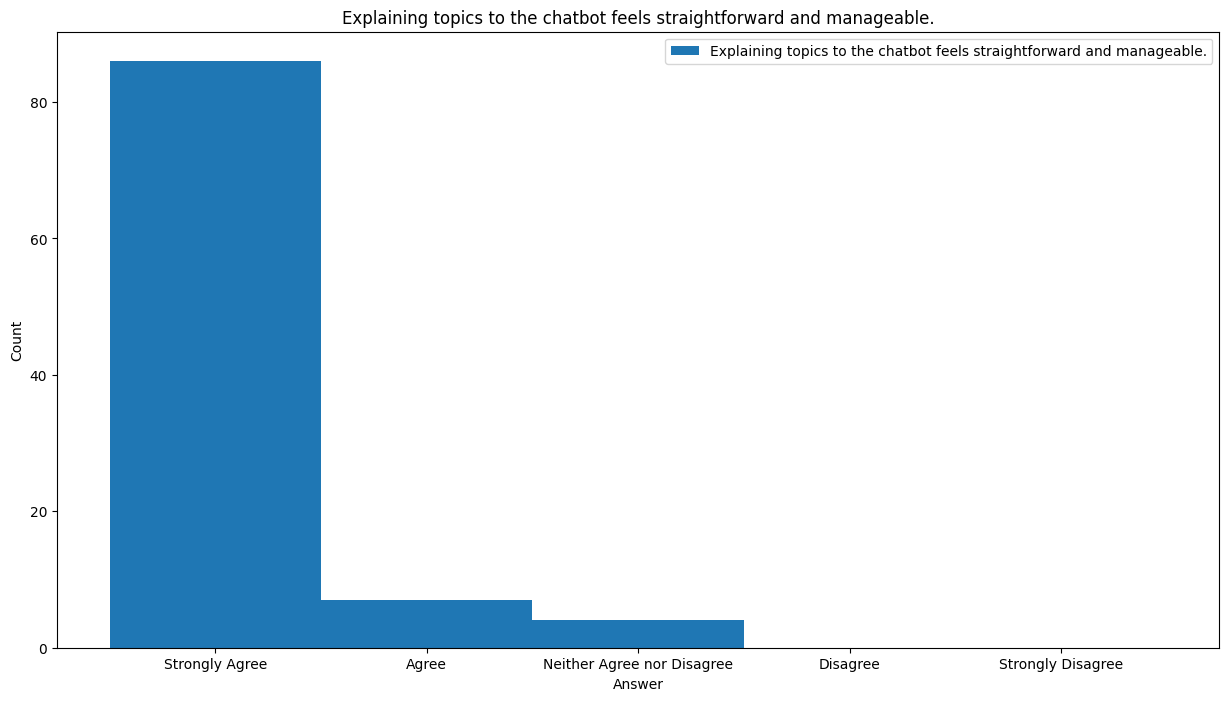

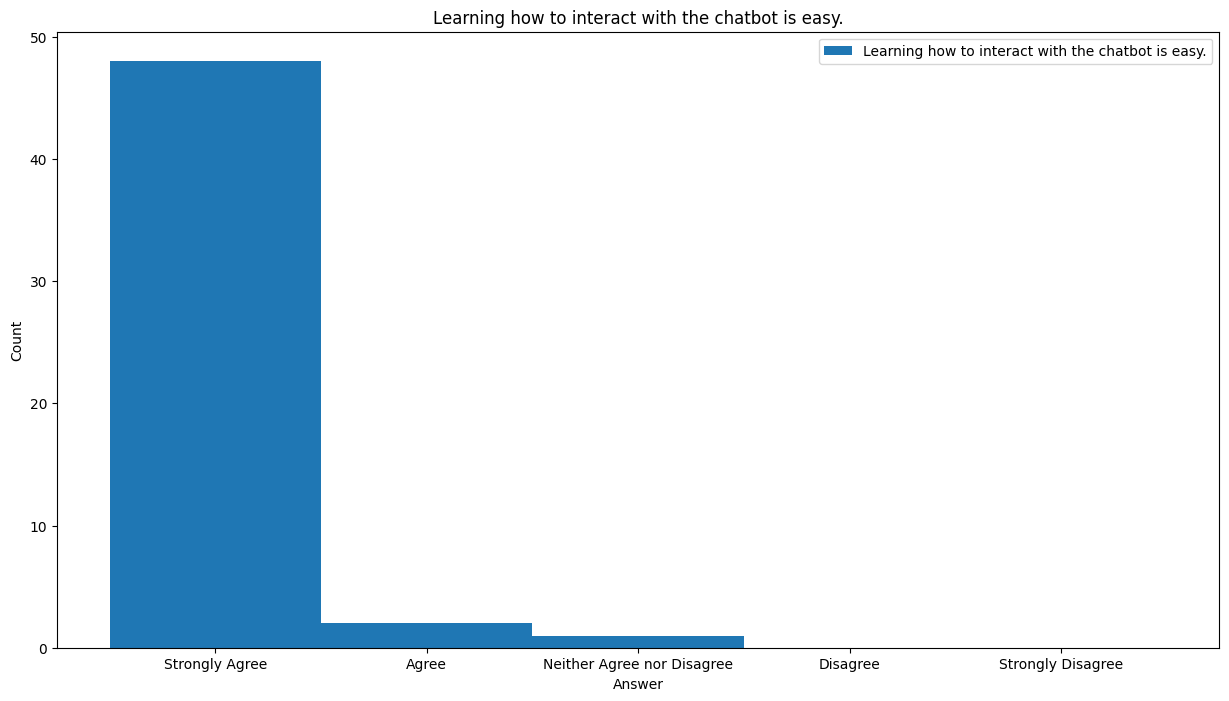

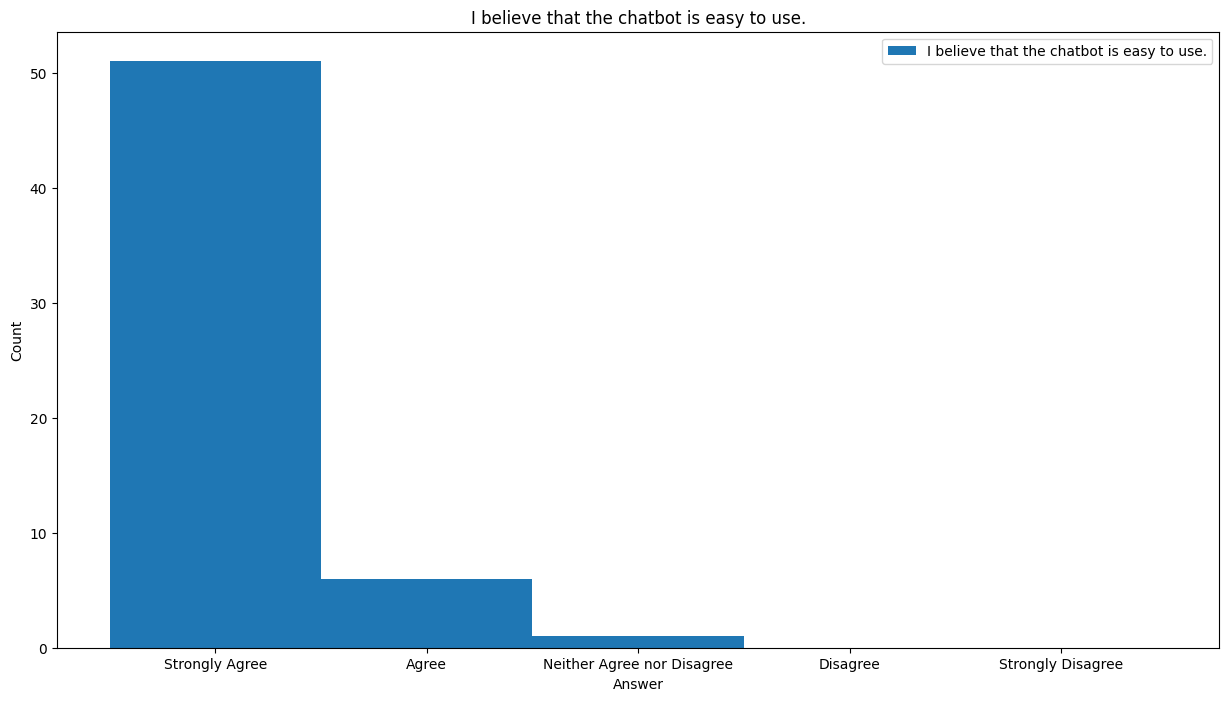

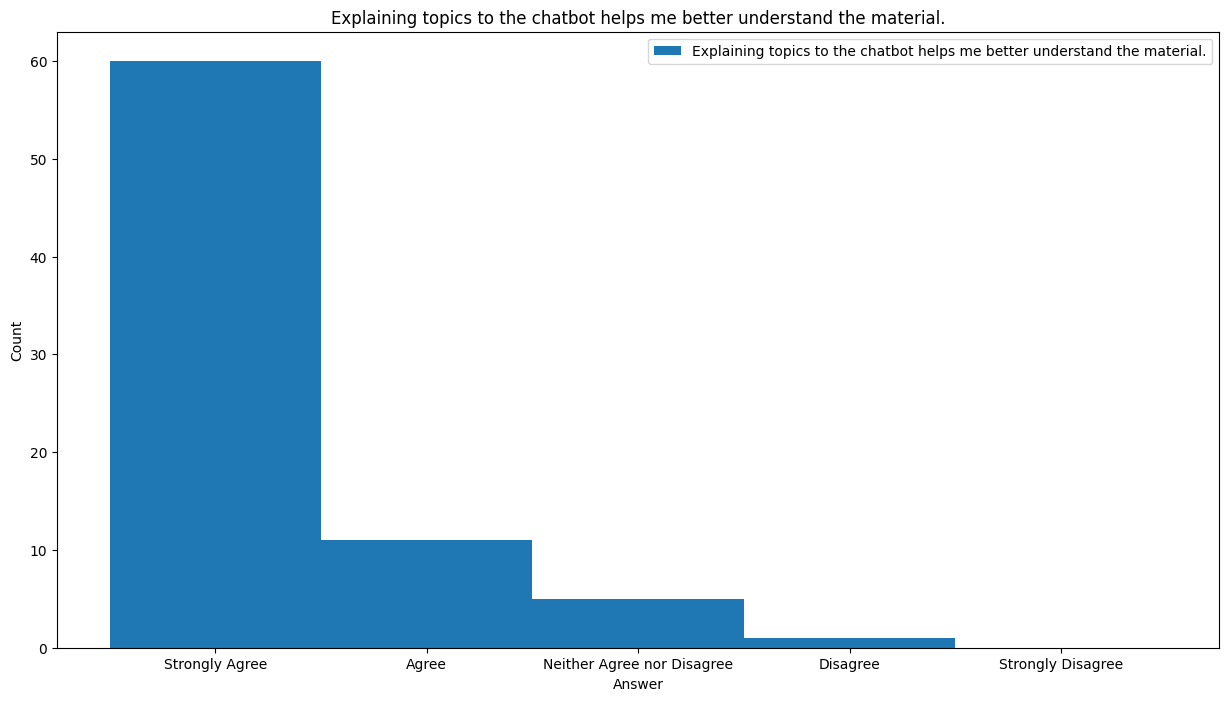

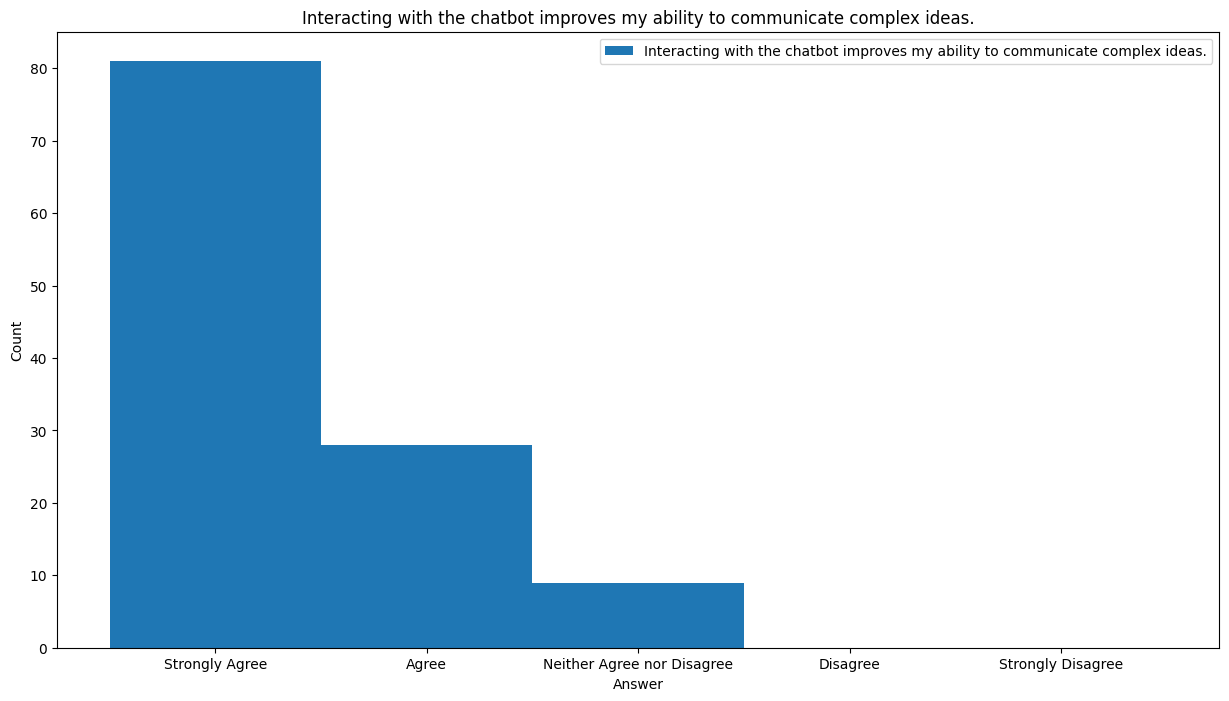

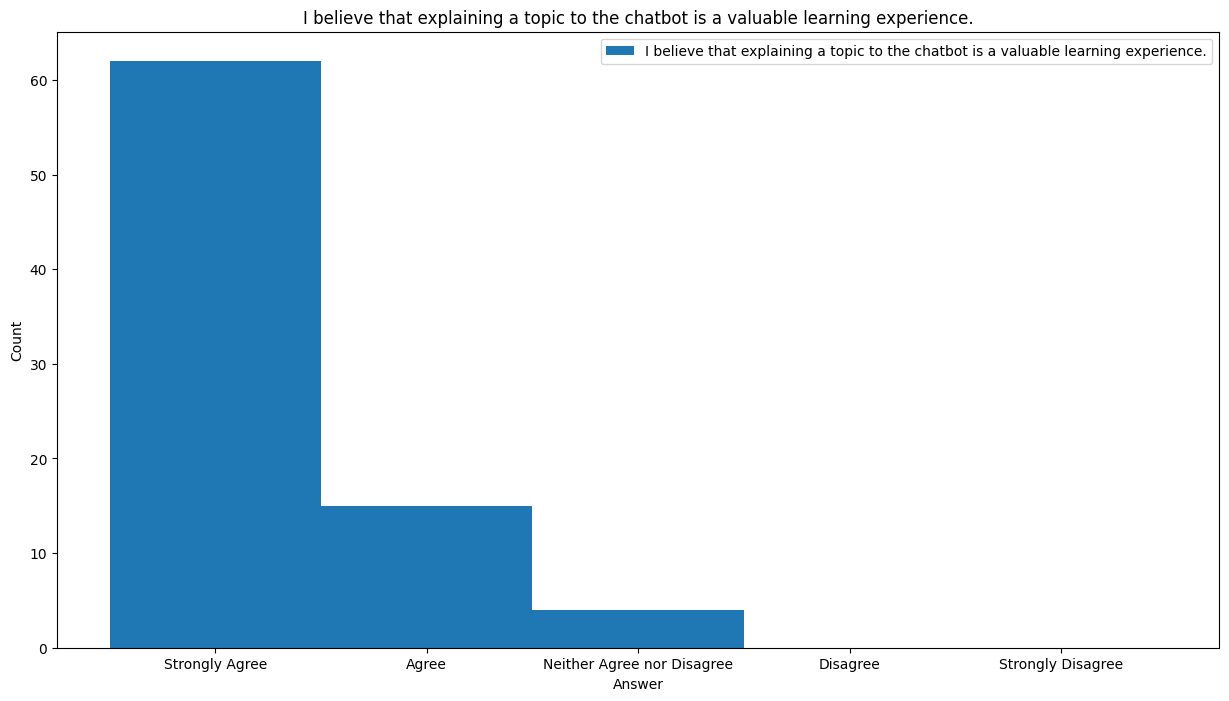

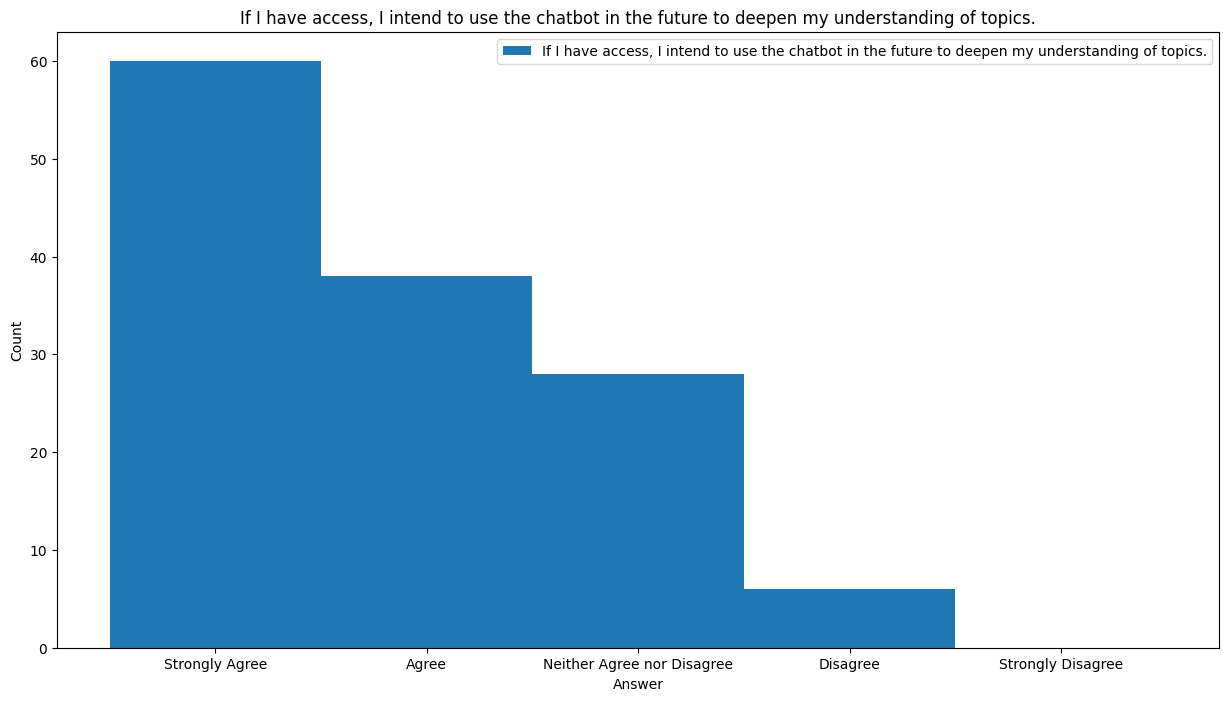

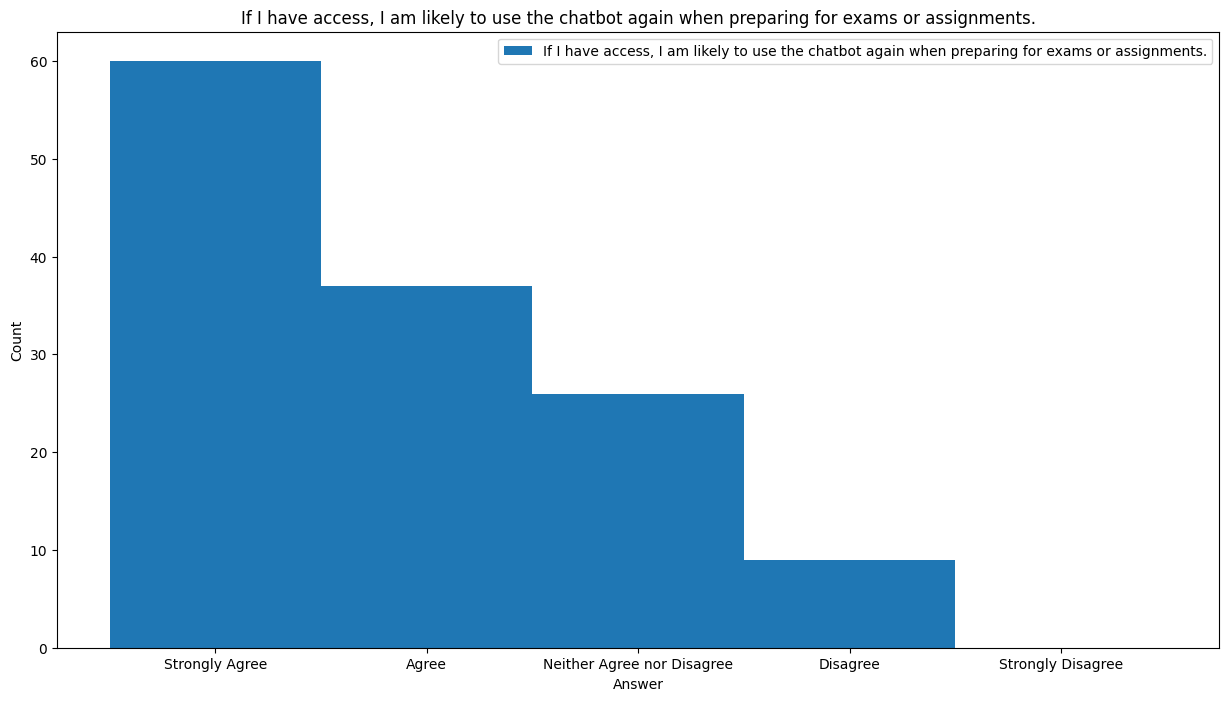

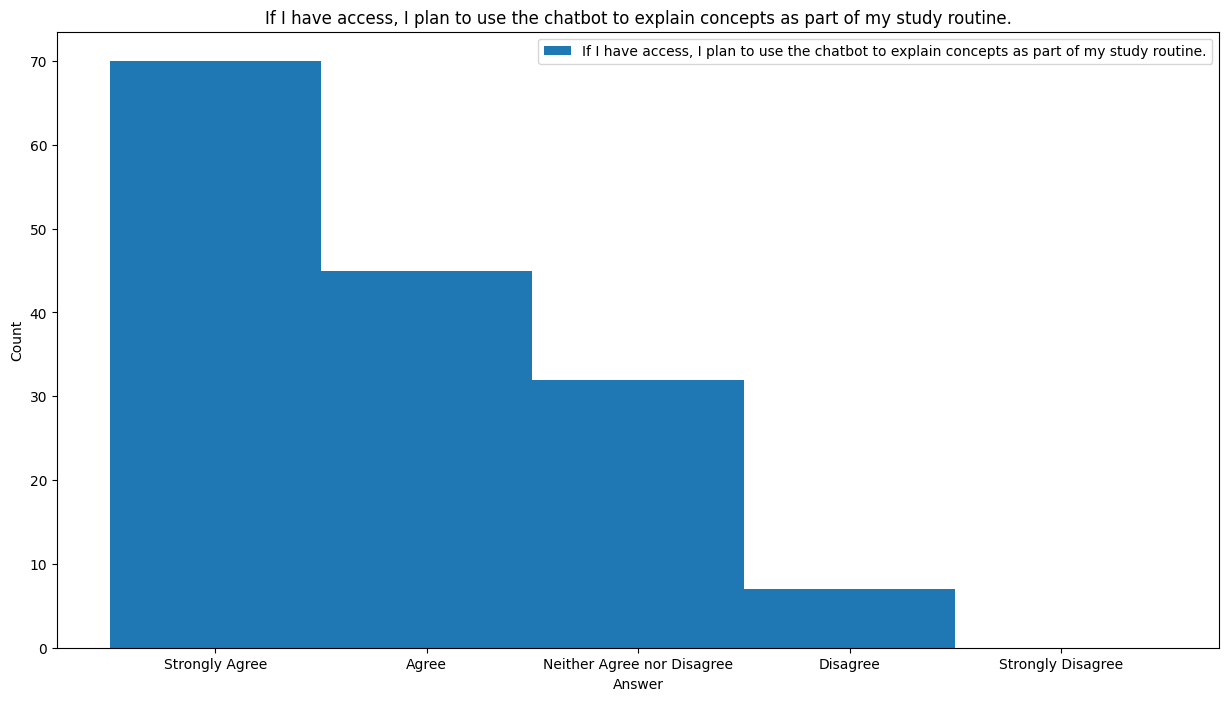

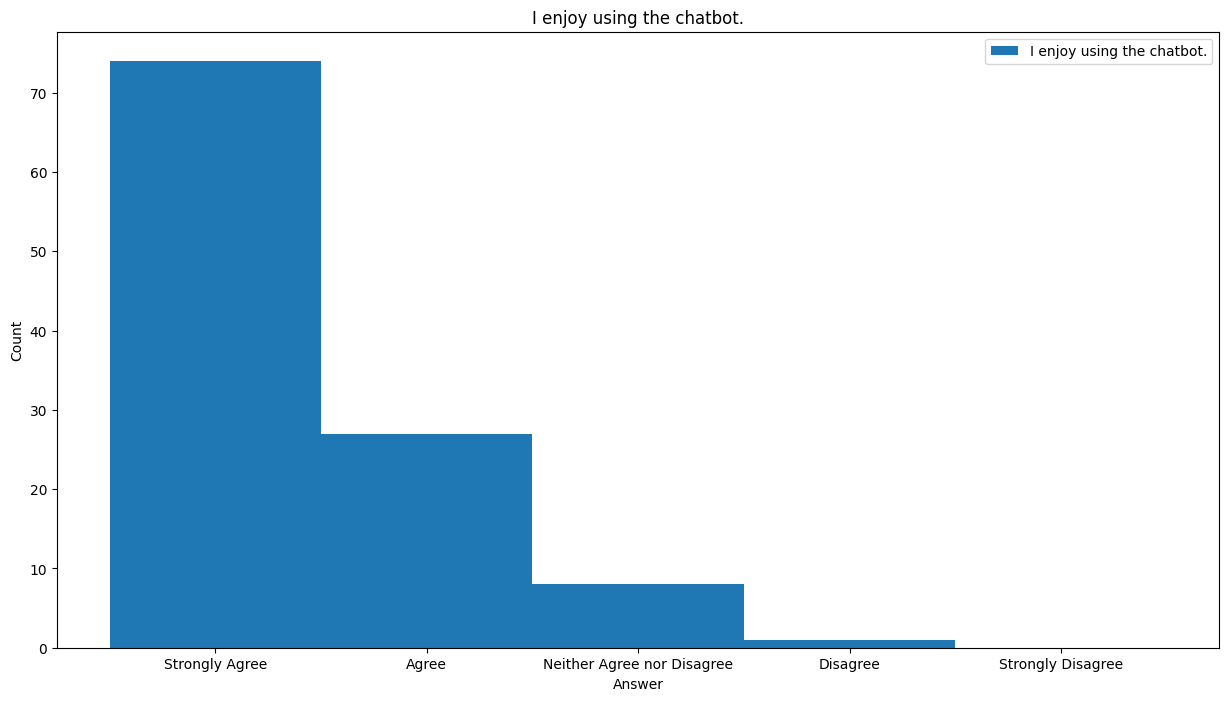

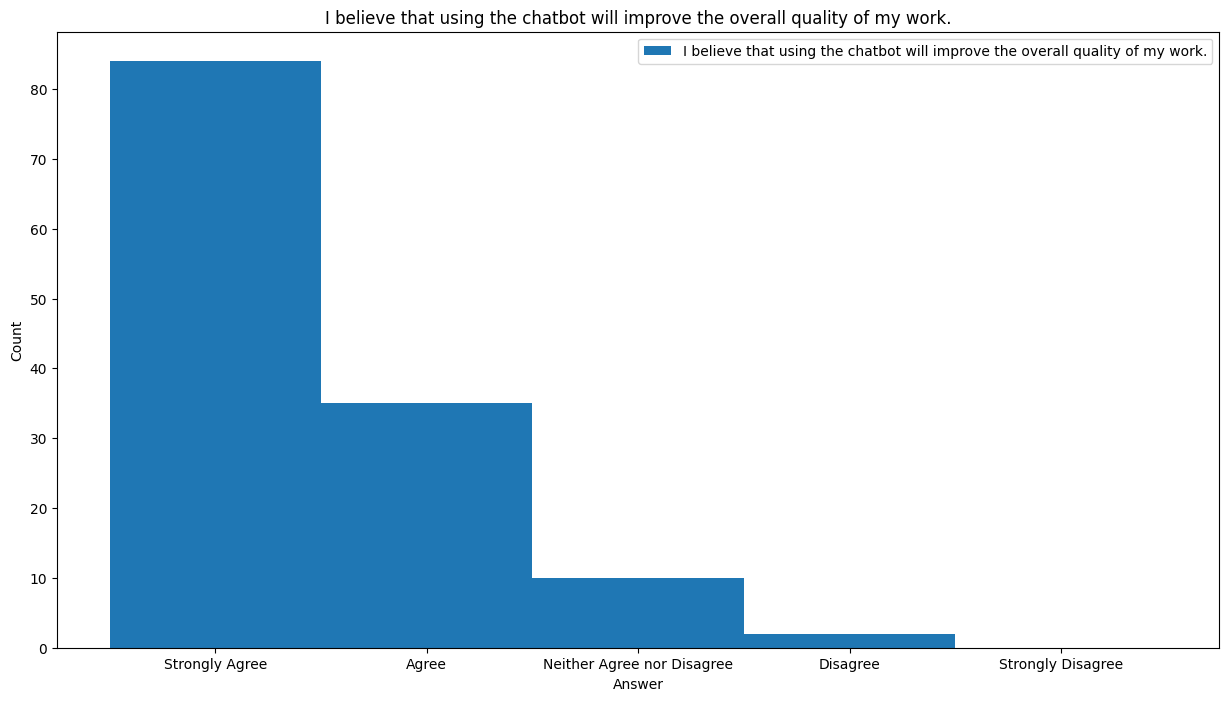

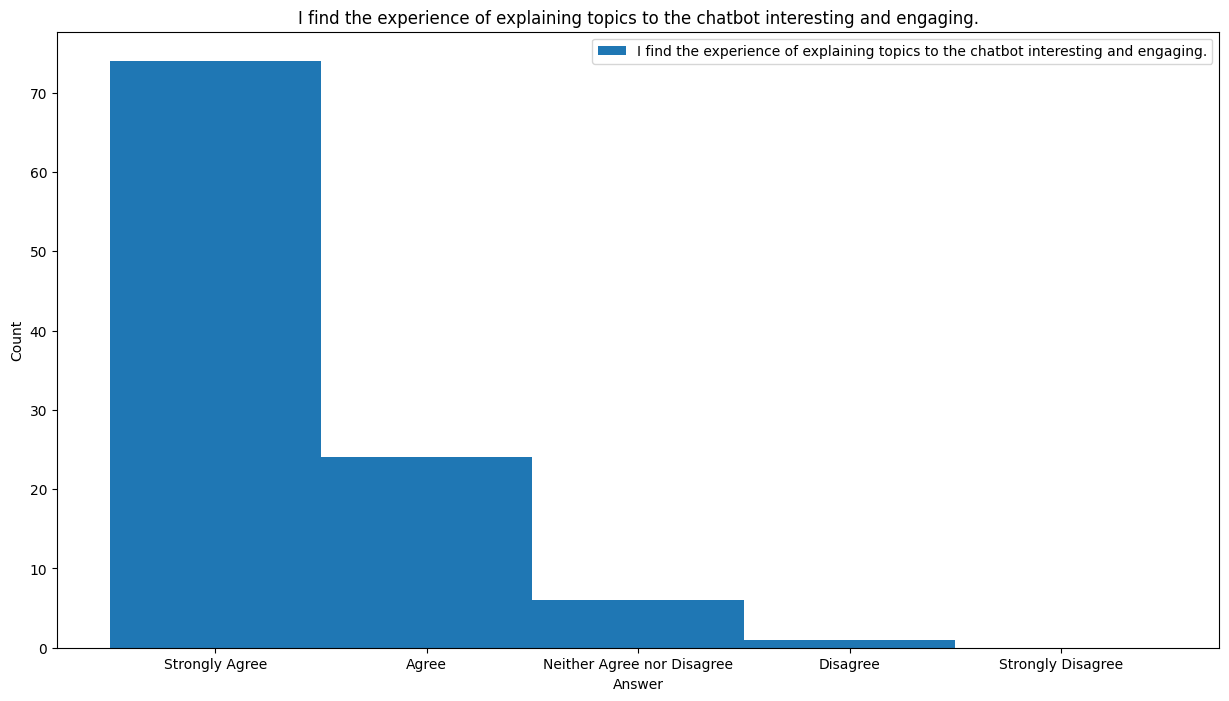

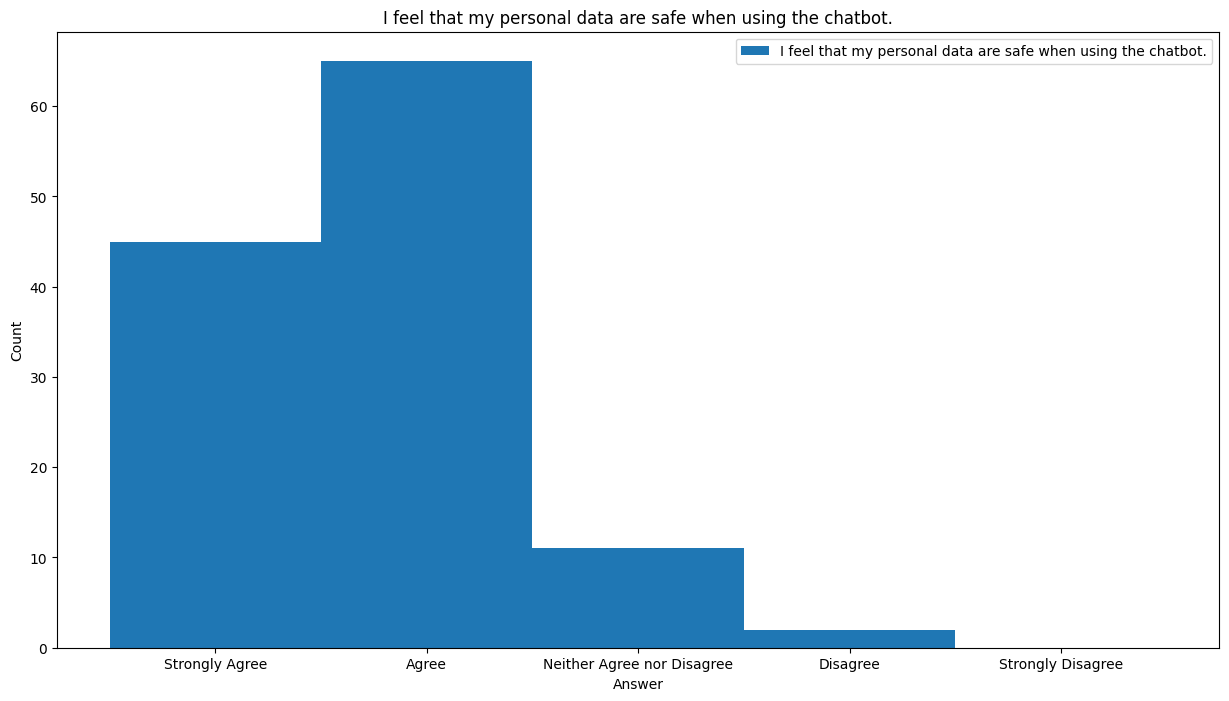

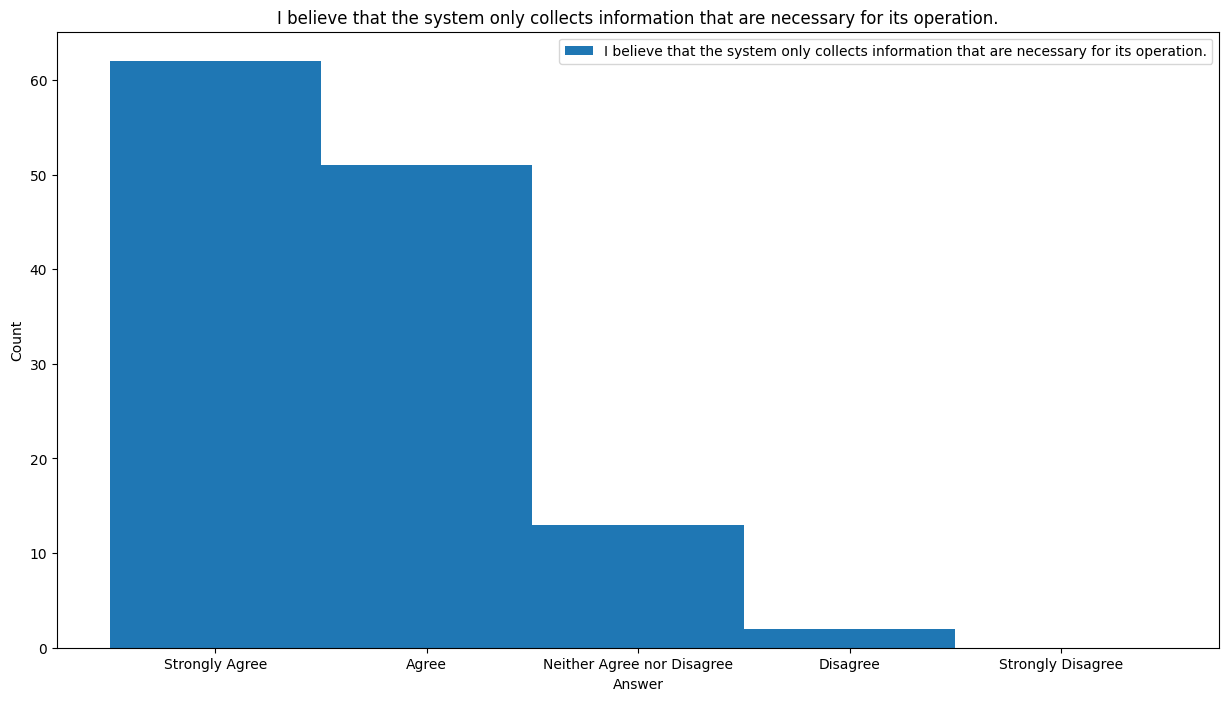

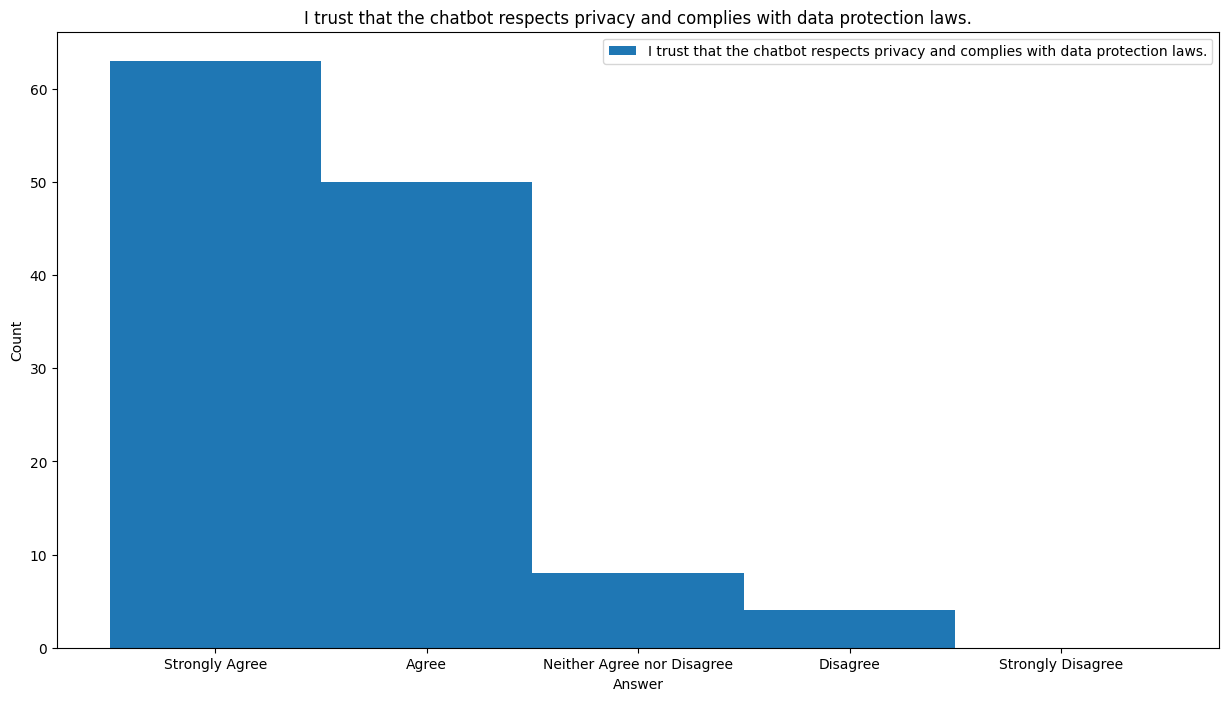

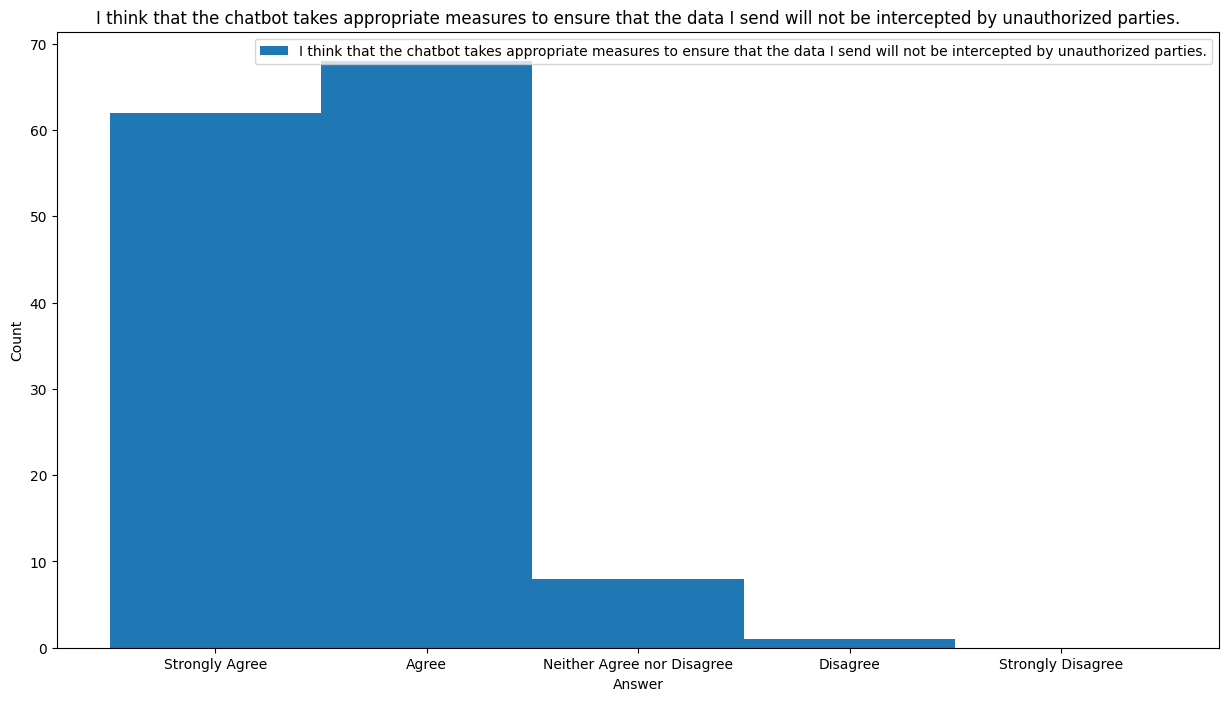

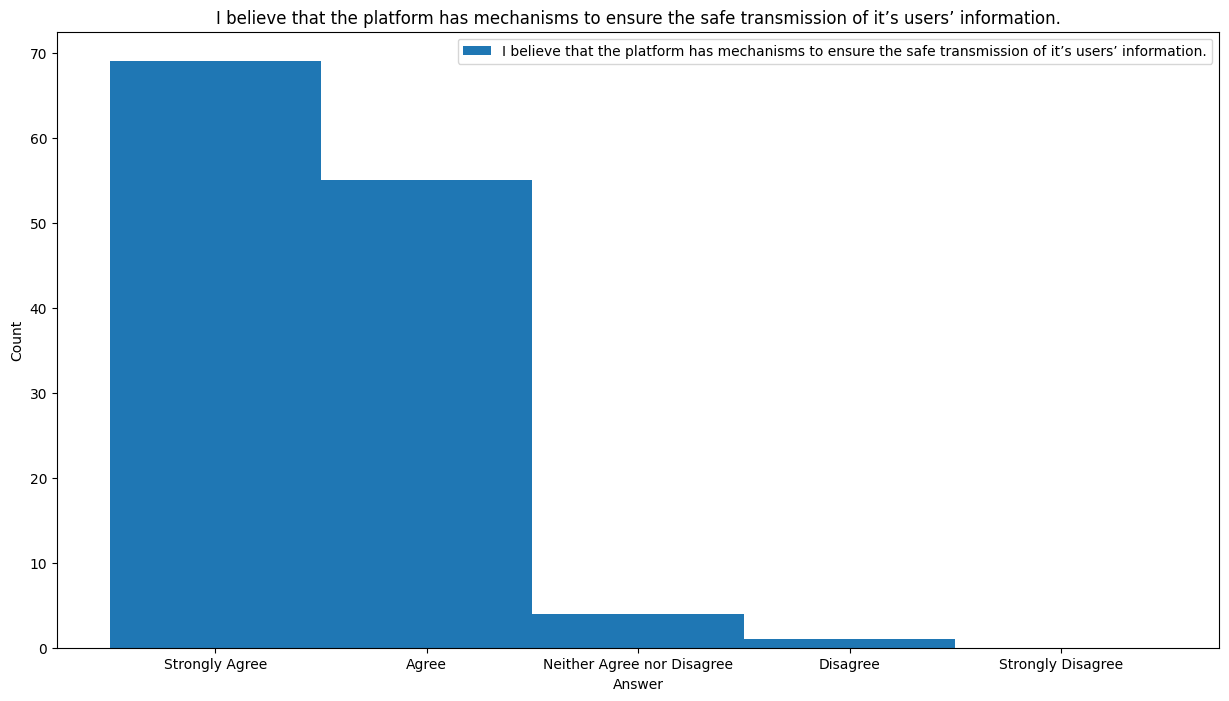

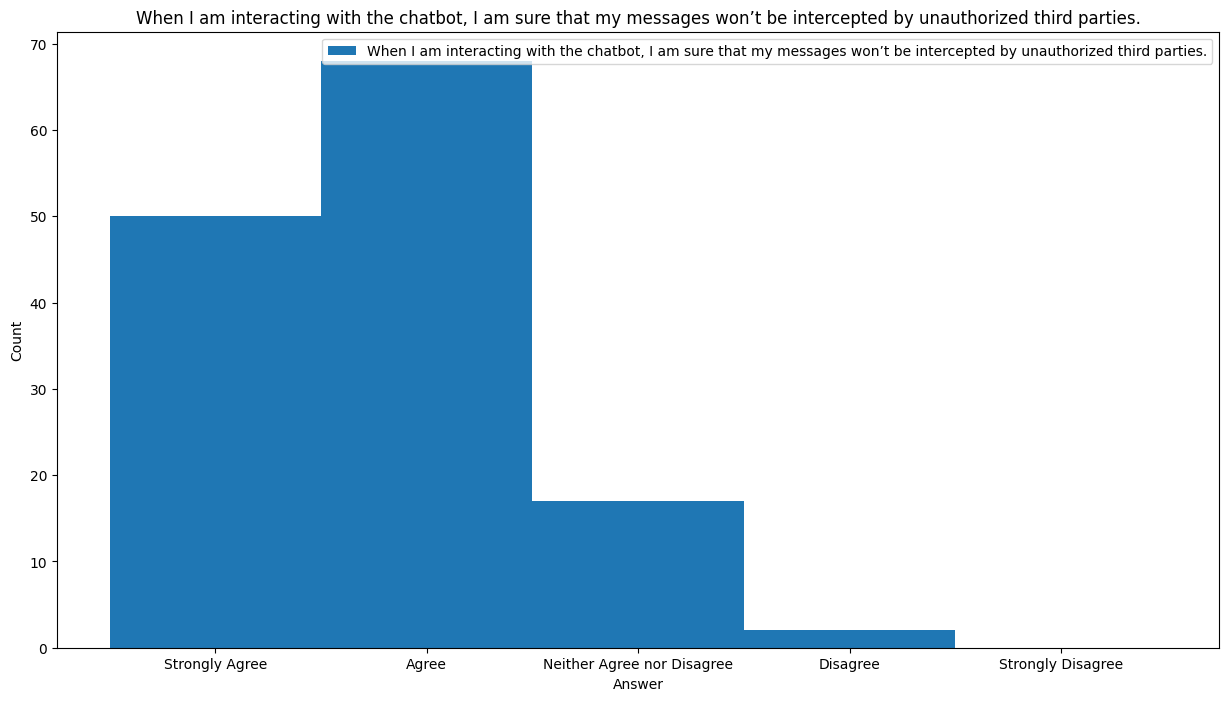

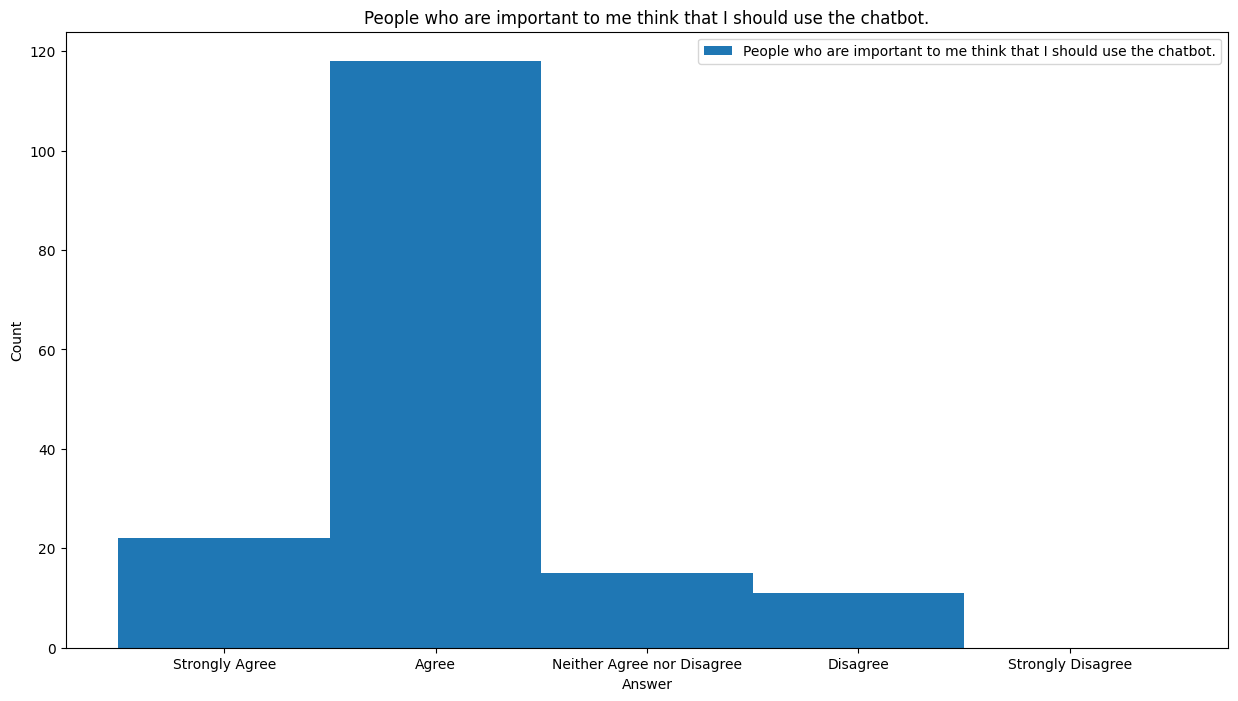

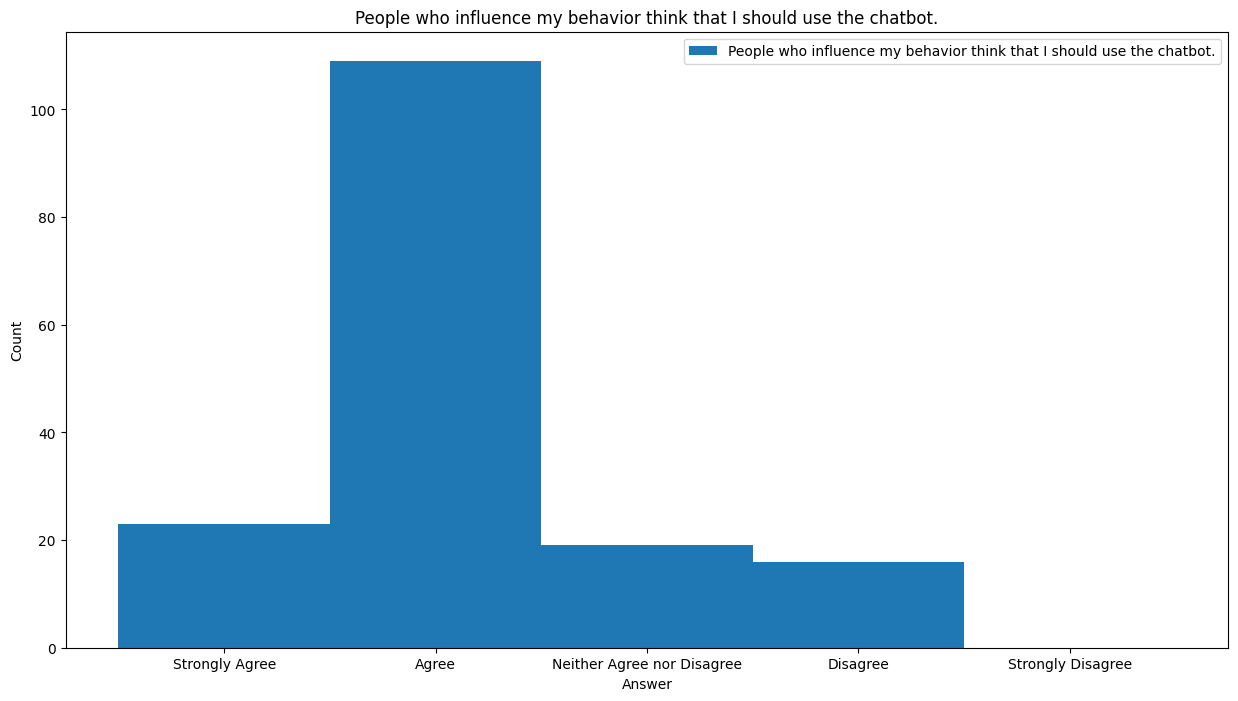

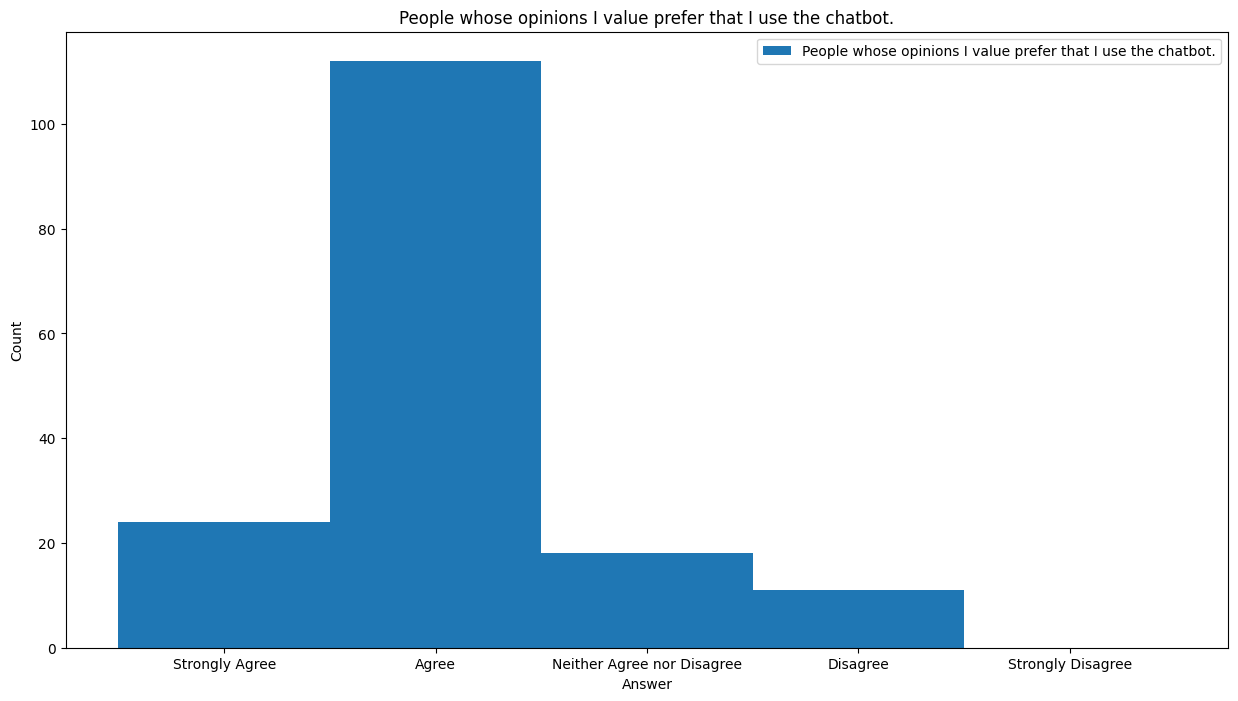

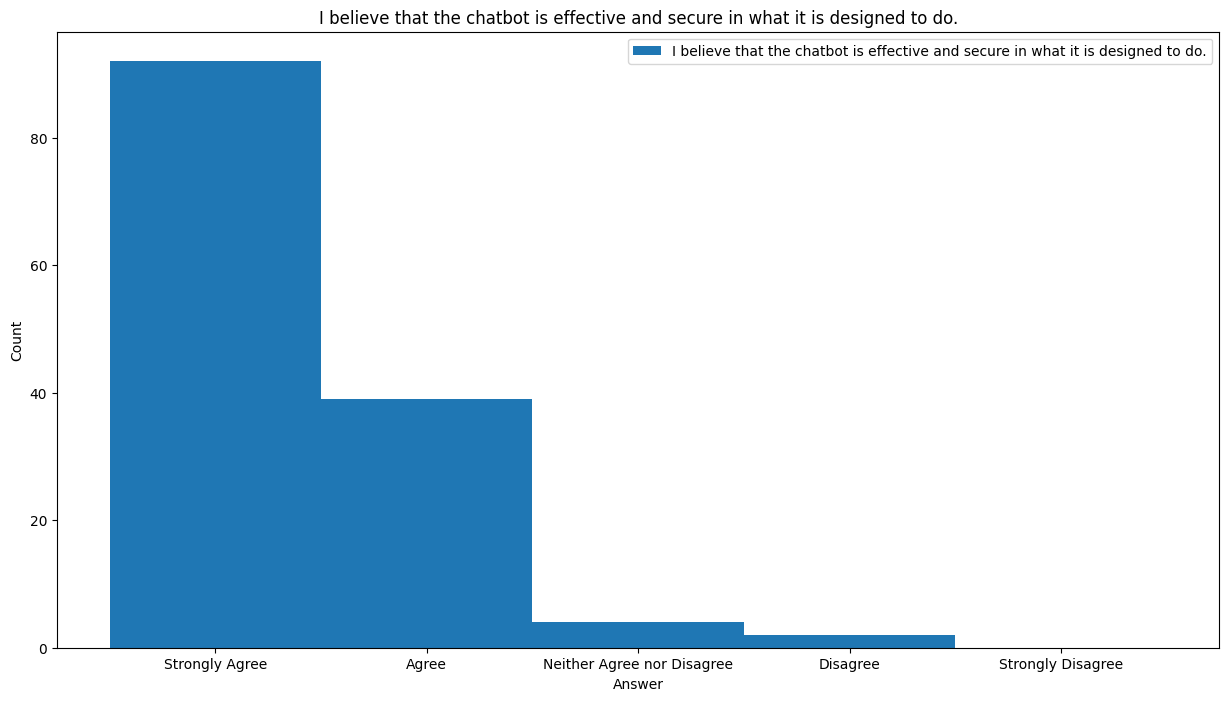

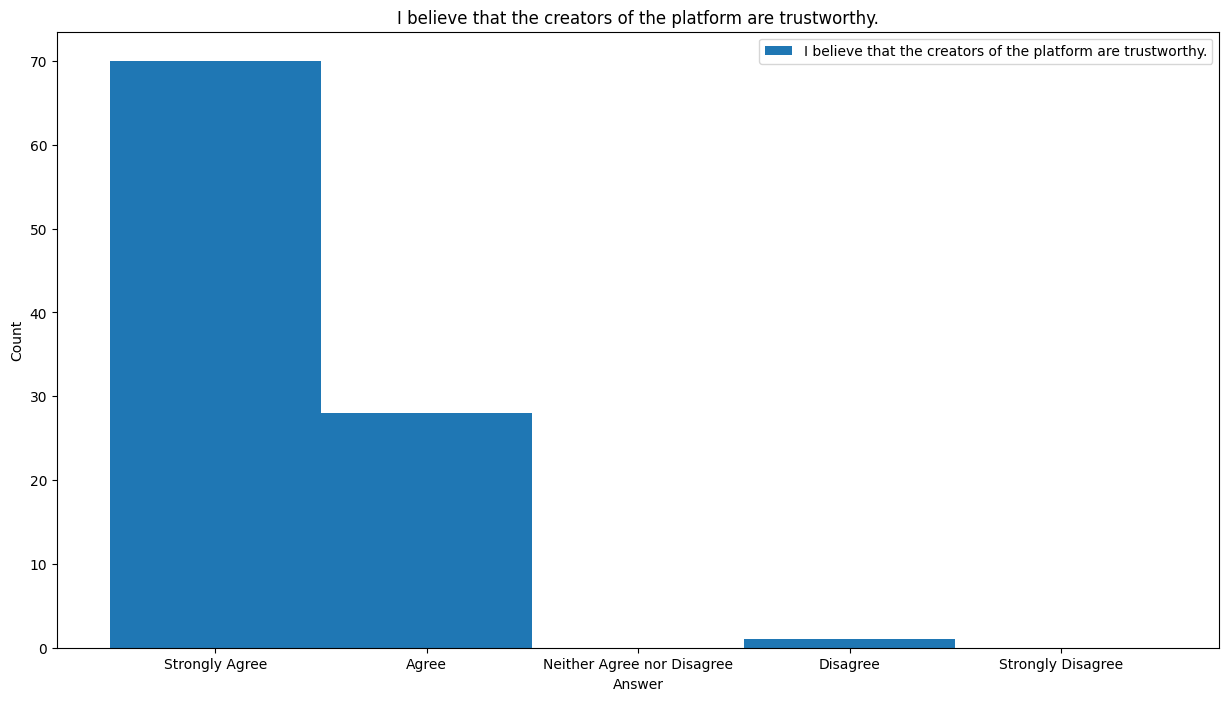

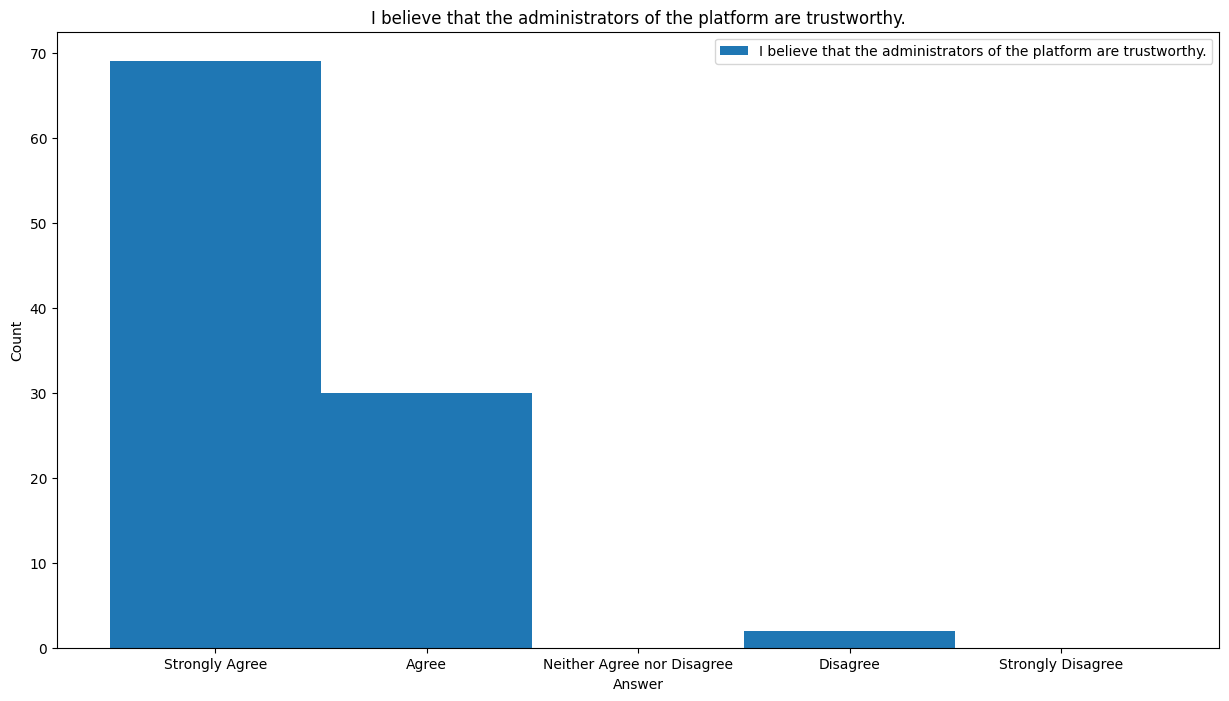

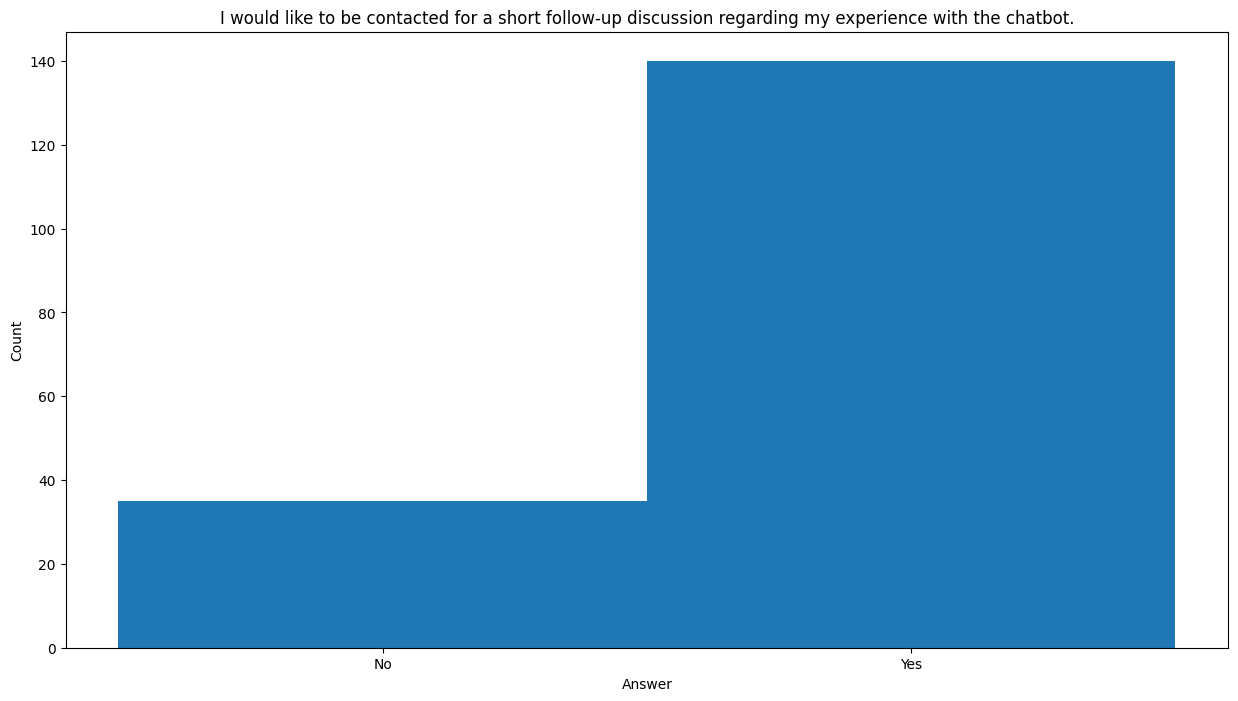

In [10]:
import matplotlib.pyplot as plt
import numpy as np

xlabels = ["Strongly Agree", "Agree", "Neither Agree nor Disagree", "Disagree", "Strongly Disagree"]

for q in question_answers:
    if q not in opent_ended and q  not in yes_no:
        answers = question_answers[q]["answers"]
        x = [answers[a] for a in answers]
        
        # Define bin edges for a histogram with 5 bins centered on the integers 1–5
        bins = np.arange(0.5, 6.5, 1)
        
        plt.figure(figsize=(15, 8))
        plt.hist(x, bins=bins, align='mid', label=q)
        plt.title(q)
        plt.xlabel("Answer")
        plt.ylabel("Count")
        plt.xticks(range(1, 6), xlabels)  # Set ticks at 1 through 5
        plt.legend(loc="upper right")  # Add a legend if necessary
        plt.show()
    elif q in yes_no:
        answers = question_answers[q]["answers"]
        x = [answers[a] for a in answers]
        plt.figure(figsize=(15, 8))
        plt.hist(x, bins=2, align='mid', label=q)
        plt.title(q)
        plt.xlabel("Answer")
        plt.ylabel("Count")
        plt.xticks([0.25, 0.75], ["No", "Yes"])



In [11]:
for q in opent_ended:
    answers = question_answers[q]["answers"]
    print(q, end=": ")
    nonempty = [answers[a] for a in answers if len(answers[a]) >5]
    print(len(nonempty))

**(Optional)** What are the benefits of explaining to the chatbot?: 72
**(Optional)** What are the limitations?: 69
**(Optional)** What could be improved?: 50


In [12]:
df.to_json("feedback.jsonl", orient="records", lines=True)

In [13]:
pros = pd.read_json("open_ended_questions/0_anno.jsonl", lines=True)

In [14]:
pros.sum()

Feedback              It forced me to review the material regularly ...
Incentive to study                                                   11
Spot weaknesses                                                      47
Convenient                                                            7
No judgement                                                          7
dtype: object

In [15]:
cons = pd.read_json("open_ended_questions/1_anno.jsonl", lines=True)
cons.sum()

Feedback                 It didn't always get what i meant and sometime...
Comprehension                                                           52
Limited Interaction                                                     34
Functional Constraint                                                   10
Effort                                                                  15
dtype: object